In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## Prepare data

In [82]:
dataset = pd.read_csv('Dataset_raw_20230414-20230630.csv')

In [83]:
dataset.head()

,time,Building Power/Total Active Power,HVAC Power/Total Active Power,Breakroom VAV1_02/Current Cooling Setpoint,Breakroom VAV1_02/Current Heating Setpoint,Collab Lounge VAV1_01/Current Cooling Setpoint,Collab Lounge VAV1_01/Current Heating Setpoint,Conference VAV1_04/Current Cooling Setpoint,Conference VAV1_04/Current Heating Setpoint,GE Additive Manufacturing VAV2_01/Current Cooling Setpoint,...,Offices 108_110 VAV1_06/Current Heating Setpoint,Open Office VAV1_05/Current Cooling Setpoint,Open Office VAV1_05/Current Heating Setpoint,Training Room Nine VAV1_08/Current Cooling Setpoint,Training Room Nine VAV1_08/Current Heating Setpoint,Training Room Twelve VAV1_09/Current Cooling Setpoint,Training Room Twelve VAV1_09/Current Heating Setpoint,Weather Station/Outside Humidity,Weather Station/Outside Temp,Weather Station/Solar Radiation
0,2023-04-14 00:00:18.671,6410.6180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-14 00:00:53.673,6533.5146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-14 00:01:29.676,6425.5580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-14 00:01:52.684,6545.1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-14 00:03:16.693,7480.0654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# HVAC stands for Heating, Ventilation, and Air Conditioning. 
dataset = dataset.drop('Building Power/Total Active Power', axis=1)
# 'ffill' means "forward fill." Tte missing values will be filled with the most recent non-null value in the same column.
dataset.fillna(method='ffill', inplace=True)
# any row containing at least one NaN value will be dropped. 
# axis=0 indicates that the operation will be applied along the rows
dataset.dropna(how='any', axis=0, inplace=True)

# convert the dates to datetime to be able to acess it
timestamp = pd.to_datetime(dataset['time'])
# The day of the week with Monday=0, Sunday=6.
dataset['DayofWeek'] = timestamp.dt.dayofweek
# The ordinal day of the year
dataset['DayofYear'] = timestamp.dt.dayofyear

In [85]:
dataset.head()

,time,HVAC Power/Total Active Power,Breakroom VAV1_02/Current Cooling Setpoint,Breakroom VAV1_02/Current Heating Setpoint,Collab Lounge VAV1_01/Current Cooling Setpoint,Collab Lounge VAV1_01/Current Heating Setpoint,Conference VAV1_04/Current Cooling Setpoint,Conference VAV1_04/Current Heating Setpoint,GE Additive Manufacturing VAV2_01/Current Cooling Setpoint,GE Additive Manufacturing VAV2_01/Current Heating Setpoint,...,Open Office VAV1_05/Current Heating Setpoint,Training Room Nine VAV1_08/Current Cooling Setpoint,Training Room Nine VAV1_08/Current Heating Setpoint,Training Room Twelve VAV1_09/Current Cooling Setpoint,Training Room Twelve VAV1_09/Current Heating Setpoint,Weather Station/Outside Humidity,Weather Station/Outside Temp,Weather Station/Solar Radiation,DayofWeek,DayofYear
8382,2023-04-14 08:35:44.056,15497.989,74.894394,72.894394,74.212616,72.212616,73.106316,71.106316,77.0,75.0,...,72.73064,72.43602,70.43602,72.47923,70.47923,55.0,62.1,91.0,4,104
8383,2023-04-14 08:35:44.224,15342.122,74.894394,72.894394,74.212616,72.212616,73.106316,71.106316,77.0,75.0,...,72.73064,72.43602,70.43602,72.47923,70.47923,55.0,62.1,91.0,4,104
8384,2023-04-14 08:35:45.223,14988.585,74.894394,72.894394,74.212616,72.212616,73.106316,71.106316,77.0,75.0,...,72.73064,72.43602,70.43602,72.47923,70.47923,55.0,62.1,91.0,4,104
8385,2023-04-14 08:35:45.956,14988.585,74.894394,72.894394,74.212616,72.212616,73.106316,71.106316,77.0,75.0,...,72.73064,72.43602,70.43602,72.47923,70.47923,55.0,62.1,91.0,4,104
8386,2023-04-14 08:35:46.224,15189.883,74.894394,72.894394,74.212616,72.212616,73.106316,71.106316,77.0,75.0,...,72.73064,72.43602,70.43602,72.47923,70.47923,55.0,62.1,91.0,4,104


<Axes: xlabel='time'>

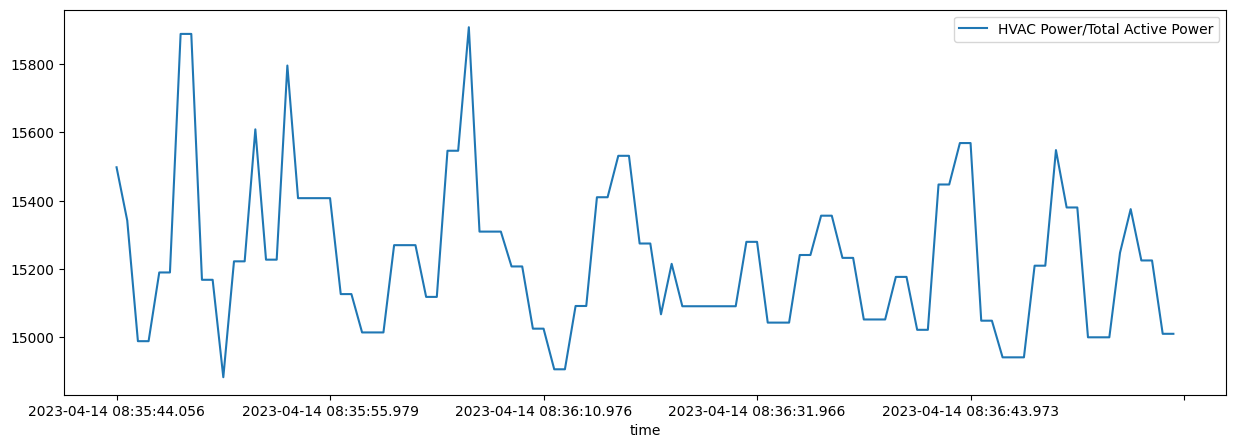

In [86]:
dataset.head(100).plot(x='time', y=['HVAC Power/Total Active Power'], figsize=(15, 5))

In [55]:
#Training data has to be sequencial - first 4 weeks
train_size = 24 * 7 * 4

#Number of samples to lookback for each sample
lookback=24 * 7

#Separate training and test data
train_requests = scaled_requests[0:train_size,:]

#Add an additional week for lookback.
test_requests = scaled_requests[train_size-lookback:,:]

NameError: name 'scaled_requests' is not defined

In [ ]:
# get rid of the time column and convert the rest of the columns to float
#dataset.index = pd.to_datetime(dataset['time'], format='%Y-%m-%d %H:%M:%S.%f')
dataset = dataset.drop('time', axis=1)

#dataset = dataset.astype(float)
dataset.iloc[:-2] = dataset.iloc[:-2].astype(float)
dataset.head()

,HVAC Power/Total Active Power,Breakroom VAV1_02/Current Cooling Setpoint,Breakroom VAV1_02/Current Heating Setpoint,Collab Lounge VAV1_01/Current Cooling Setpoint,Collab Lounge VAV1_01/Current Heating Setpoint,Conference VAV1_04/Current Cooling Setpoint,Conference VAV1_04/Current Heating Setpoint,GE Additive Manufacturing VAV2_01/Current Cooling Setpoint,GE Additive Manufacturing VAV2_01/Current Heating Setpoint,GE Additive Manufacturing VAV2_02/Current Cooling Setpoint,...,Open Office VAV1_05/Current Heating Setpoint,Training Room Nine VAV1_08/Current Cooling Setpoint,Training Room Nine VAV1_08/Current Heating Setpoint,Training Room Twelve VAV1_09/Current Cooling Setpoint,Training Room Twelve VAV1_09/Current Heating Setpoint,Weather Station/Outside Humidity,Weather Station/Outside Temp,Weather Station/Solar Radiation,DayofWeek,DayofYear
1108720,13748.0660,74.898834,72.898834,74.21720,72.21720,71.783640,69.783640,77.0,75.0,77.0,...,70.90507,73.554770,71.554770,72.47359,70.47359,81.0,69.7,116.0,4,132
972960,59505.9140,74.899940,72.899940,74.22178,72.22178,71.783640,69.783640,77.0,75.0,77.0,...,72.74182,73.559074,71.559074,72.46907,70.46907,38.0,72.0,888.0,1,129
1464281,14064.4390,74.898834,72.898834,74.22178,72.22178,71.785866,69.785866,77.0,75.0,77.0,...,72.74386,73.561220,71.561220,72.47923,70.47923,26.0,81.6,777.0,0,142
2019824,1291.4681,80.000000,60.000000,80.00000,60.00000,80.000000,60.000000,80.0,60.0,80.0,...,60.00000,80.000000,60.000000,80.00000,60.00000,29.0,81.7,202.0,5,161
261903,13249.5430,74.895510,72.895510,74.21949,72.21949,73.106316,71.106316,77.0,75.0,77.0,...,72.73064,73.551544,71.551544,72.47810,70.47810,36.0,75.6,570.0,3,110


In [ ]:
dataset.dtypes

HVAC Power/Total Active Power                                 float64
Breakroom VAV1_02/Current Cooling Setpoint                    float64
Breakroom VAV1_02/Current Heating Setpoint                    float64
Collab Lounge VAV1_01/Current Cooling Setpoint                float64
Collab Lounge VAV1_01/Current Heating Setpoint                float64
Conference VAV1_04/Current Cooling Setpoint                   float64
Conference VAV1_04/Current Heating Setpoint                   float64
GE Additive Manufacturing VAV2_01/Current Cooling Setpoint    float64
GE Additive Manufacturing VAV2_01/Current Heating Setpoint    float64
GE Additive Manufacturing VAV2_02/Current Cooling Setpoint    float64
GE Additive Manufacturing VAV2_02/Current Heating Setpoint    float64
GE Additive Manufacturing VAV2_03/Current Cooling Setpoint    float64
GE Additive Manufacturing VAV2_03/Current Heating Setpoint    float64
GE Binder Jet VAV2_04/Current Cooling Setpoint                float64
GE Binder Jet VAV2_0

In [ ]:

from sklearn.preprocessing import StandardScaler
#  standardizing features in a dataset
scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = scaler.fit_transform(dataset)

In [ ]:
#Plat the data loaded to visualize trends
plt.figure(figsize=(20,5))
plt.plot(scaled_dataset[:10]['HVAC Power/Total Active Power'])
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 2000x500 with 0 Axes>

In [ ]:
X = [] # test data
y = [] # prediction data

n_predict = 1 # amount of data that is predicted
n_past = 100 # amount of data used for the prediction

In [ ]:
for i in range(n_past, len(dataset) - n_predict + 1):
    X.append(scaled_dataset[i - n_past:i, 0:dataset.shape[1]])
    y.append(scaled_dataset[i + n_predict - 1:i + n_predict, 0])

In [ ]:
# turn X and y into arrays
X, y = np.array(X), np.array(y)

In [ ]:
len(X), len(y)

(277803, 277803)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.optimizers.schedules import InverseTimeDecay
from keras.optimizers import Adam

In [ ]:
# gradient clipping
initial_learning_rate = 0.001
decay_steps = 1000
decay_rate = 0.95
learning_rate_fn = InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)

# create optimizer
optimizer = Adam(learning_rate = learning_rate_fn, clipvalue = 0.5)

In [ ]:
# define the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
X.shape

(277803, 100, 36)

In [ ]:
y.shape

(277803, 1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           25856     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 38305 (149.63 KB)
Trainable params: 38305 (149.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit model
#history = model.fit(X, y, epochs=10, batch_size=10, validation_split=0.1, verbose=1)
model.fit(X, y, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/50
 1579/25003 [>.............................] - ETA: 20:40 - loss: 1.0119

 1634/25003 [>.............................] - ETA: 20:51 - loss: 1.0141

In [ ]:
# plot how the training went
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')